# Volume 4: Inverse Problems
    Daniel Perkins
    MATH 439
    1/11/25

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Problem 1

Solve Equation (2) for $a(x)$.
Produce the plot shown in Figure 2.

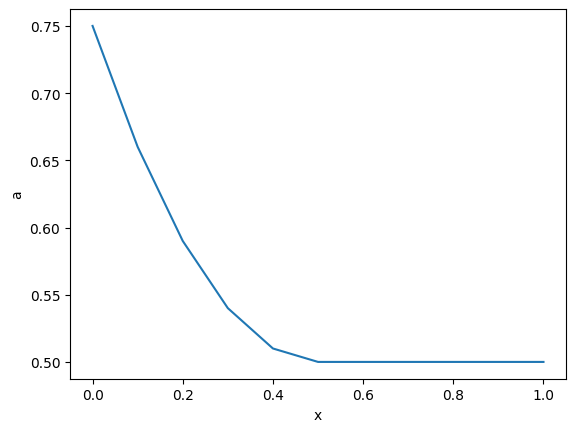

In [16]:
# Define conditions
c0 = 3/8
c1 = 5/4
xs = 0.1 * np.arange(11)

# Define functions
def u(x):
    return x**2 + x/2 + 5/16

def u_prime(x):
    return 2*x + 1/2

def f(x):
    if x<= 1/2: return -6*x**2 + 3*x - 1
    elif 1/2<x<=1: return -1
    
def intf(x):  # Integral of f
    if x <= 1/2:
        return -2*x**3 + (3/2)*x**2 - x
    else:
        first = -2*(1/2)**3 + (3/2)*(1/2)**2 - (1/2)
        second = -x+1/2
        return first + second
    
def objective(x):  # 16.5
    def the_objective(alpha):
        first = (c0 - intf(x)) / alpha
        return (first - u_prime(x))**2
    return the_objective

# Find the minimi for each x to solve for a
a = []
initial_guess = 1
for x in xs:
    the_objective = objective(x) 
    sol = minimize(the_objective, initial_guess)
    a.append(sol.x)
    
# Plot it
plt.xlabel("x")
plt.ylabel("a")
plt.plot(xs, a)
plt.show()

# Problem 2

Find the thermal conductivity function $a(x)$. Using several values of $\epsilon > 0.66049142$, plot the corresponding conductivity $a(x)$ for $x$ in `np.linspace(0, 1, 11)` to demonstrate that the problem is ill-posed.

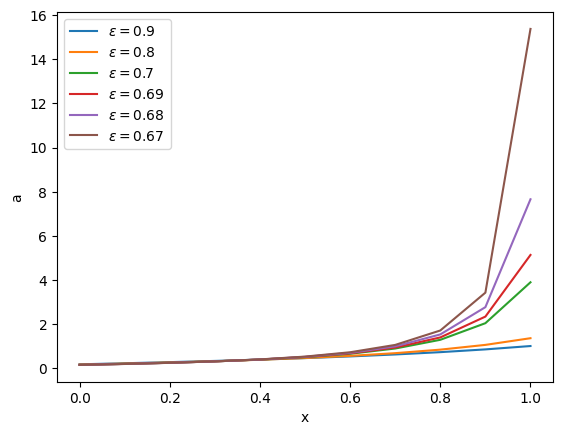

In [ ]:
c_0 = 1
c_1 = 2
xs = np.linspace(0, 1, 11)
epsilons = [0.9, 0.8, 0.7, 0.69, 0.68, 0.67]

for eps in epsilons:
# Define functions 
    def u(x): return x + 1 + eps*np.sin(eps**(-2)*x)
    def u_prime(x): return 1 + eps**(-1)*np.cos(eps**(-2)*x)
    def f(x): return -(x/x)  # -1
    def intf(x): return -x

    def objective(x):  # 16.5
        def the_objective(alpha):
            first = (c0 - intf(x)) / alpha
            return (first - u_prime(x))**2
        return the_objective

    # Find the minimi for each x to solve for a
    a = []
    initial_guess = 1
    for x in xs:
        the_objective = objective(x) 
        sol = minimize(the_objective, initial_guess)
        a.append(sol.x)
        
    # Plot it
    plt.plot(xs, a, label=rf"$\epsilon=${eps}")
    
# Finish plot
plt.xlabel("x")
plt.ylabel("a") 
plt.legend()
plt.show()


# Problem 3

The file `measured_heat.npy` contains measurements over time ($t \in [0, 2]$) of the temperature along an insulated rod with a varying diffusion coefficient $\nu(x)$.
The first row corresponds to the initial state of the heat distribution in the rod.
Use equations in the lab to find an estimate $\vec \nu$ of $\nu(x)$ that minimizes the sum of squared errors.
For $x \in [-10, 10]$, plot $\vec \nu$ along with the true $\nu(x)$, which is given by
\begin{align*}
\nu(x) = \frac{5}{1+e^{-x}}+\frac{1}{2}.
\end{align*}

21 11


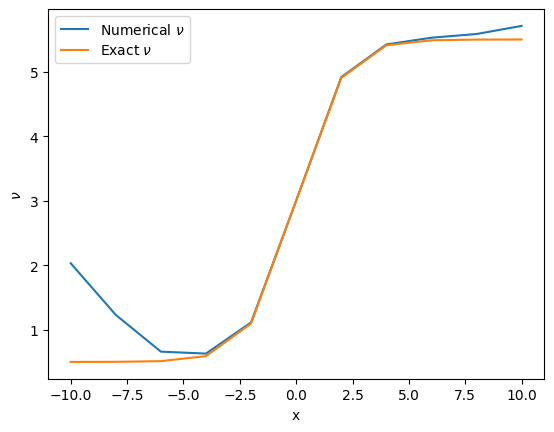

In [6]:
# This is an MxJ matrix of measured, noisy data.
U_hat = np.load('measured_heat.npy')
M, J = U_hat.shape  # M=21, J=11
print(M, J)

t = np.linspace(0, 2, M)
k = t[1]-t[0]
x = np.linspace(-10, 10, J)
h = x[1]-x[0]

def sse(nu, U_hat):
    # Initialize U with the the first row (time) of `U_hat`, then loop
    # forward in time using `nu` and equation (8)
    U = np.zeros_like(U_hat)
    U[0] = U_hat[0]
    for m in range(M-1):
        term1 = (np.roll(U[m],-1)-2*U[m]+np.roll(U[m],1))
        term2 = (np.roll(nu, -1) - np.roll(nu, 1)) * (np.roll(U[m],-1) - np.roll(U[m],1))
        U[m+1] = U[m] + (k/h**2) * (nu*term1 + (1/4)*term2)
        U[m+1,0], U[m+1,-1] = 0, 0
    return np.sum((U-U_hat)**2)

# This is a good guess. There are others that will work fine too.
guess = np.full(J, 2)

sol = minimize(sse, guess, args=U_hat, method='BFGS')  # TODO: Uncomment out
nu = sol.x

# True formula for nu
true_nu = 5/(1+np.exp(-x)) + 1/2

# Plot it
plt.plot(x, nu, label=r"Numerical $\nu$")
plt.plot(x, true_nu, label=r"Exact $\nu$")
plt.xlabel("x")
plt.ylabel(r"$\nu$")
plt.legend()
plt.show()